Lista 6

Zadanie 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
n = 1000
phi = 0.2
sigma = np.sqrt(0.4)

In [3]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [4]:
def generate_ar1(n, sigma, phi):
    z = np.random.normal(0, sigma, n)
    x = np.zeros(n)
    for i in range(1, n):
        x[i] = x[i-1] * phi + z[i]
    return x

In [5]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [6]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [12]:
sample = generate_ar1(n, sigma, phi)

In [13]:
def ar1_acvf(phi, sigma, h):
    return sigma**2 * phi ** (abs(h)) / (1 - phi**2)

In [14]:
hs = np.arange(1,11,1)

In [15]:
autokow_emp,autokow_teo = [], []
for h in hs:
    autokow_emp.append(autokowariancja(h, sample))
    autokow_teo.append(ar1_acvf(phi, sigma, h))

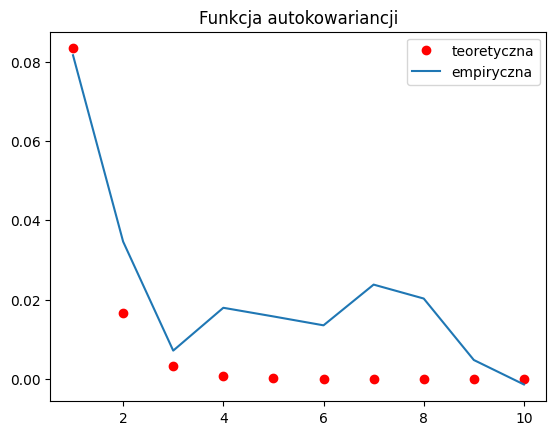

In [16]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow_emp, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

Zadanie 2

In [17]:
mc = 1000

In [18]:
autokow_mc, autokor_mc = [], []
for _ in range(mc):
    autokow_emp,autokor_emp = [], []
    sample = generate_ar1(n, sigma, phi)
    for h in hs:
        autokow_emp.append(autokowariancja(h, sample))
        autokor_emp.append(autokorelacja(h, sample))
    autokor_mc.append(autokor_emp)
    autokow_mc.append(autokow_emp)
    

In [19]:
lower_acvf = np.percentile(autokow_mc, 2.5, axis=0)
upper_acvf = np.percentile(autokow_mc, 97.5, axis=0)
mean_acvf = np.mean(autokow_mc, axis=0)
lower_acf = np.percentile(autokor_mc, 2.5, axis=0)
upper_acf = np.percentile(autokor_mc, 97.5, axis=0)
mean_acf = np.mean(autokor_mc, axis=0)

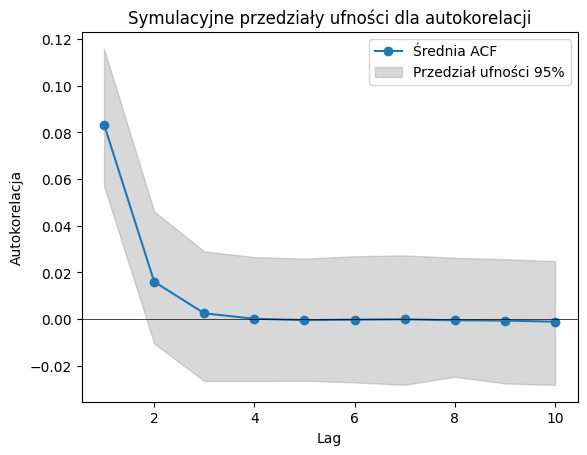

In [20]:
plt.plot(hs, mean_acvf, marker='o', label="Średnia ACF")
plt.fill_between(hs, lower_acvf, upper_acvf, color='gray', alpha=0.3, label="Przedział ufności 95%")
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Symulacyjne przedziały ufności dla autokorelacji")
plt.xlabel("Lag")
plt.ylabel("Autokorelacja")
plt.legend()
plt.show()

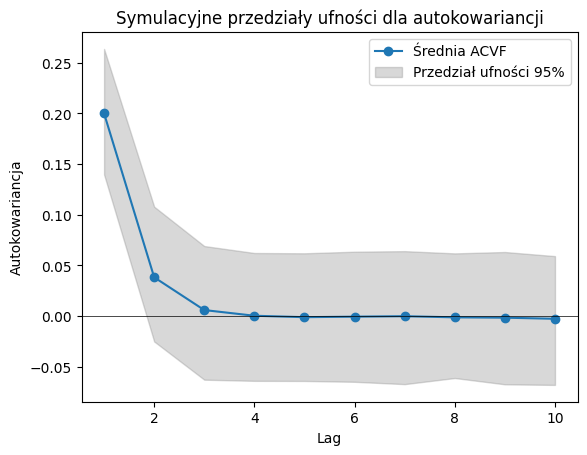

In [21]:
plt.plot(hs, mean_acf, marker='o', label="Średnia ACVF")
plt.fill_between(hs, lower_acf, upper_acf, color='gray', alpha=0.3, label="Przedział ufności 95%")
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Symulacyjne przedziały ufności dla autokowariancji")
plt.xlabel("Lag")
plt.ylabel("Autokowariancja")
plt.legend()
plt.show()